# Heart Disease Dataset
kaggle - https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.duplicated().sum()

723

In [5]:
df = df.drop_duplicates()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

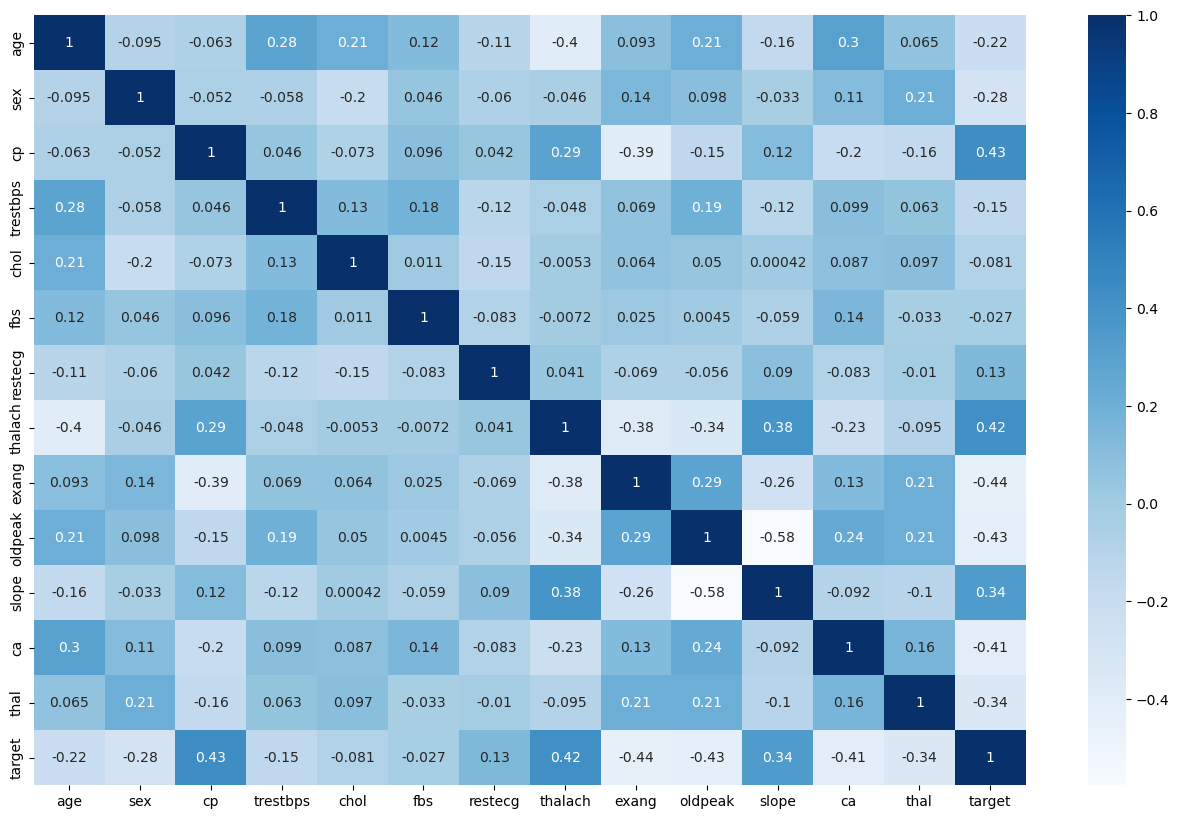

In [7]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [8]:
for c in df.columns:
    print(f'{c}: {df[c].nunique()}')

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [9]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

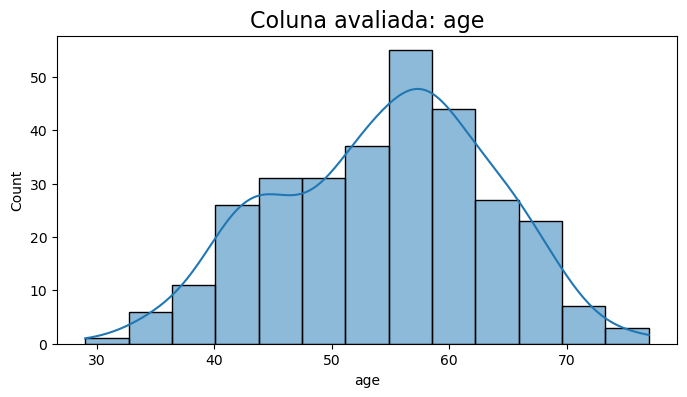

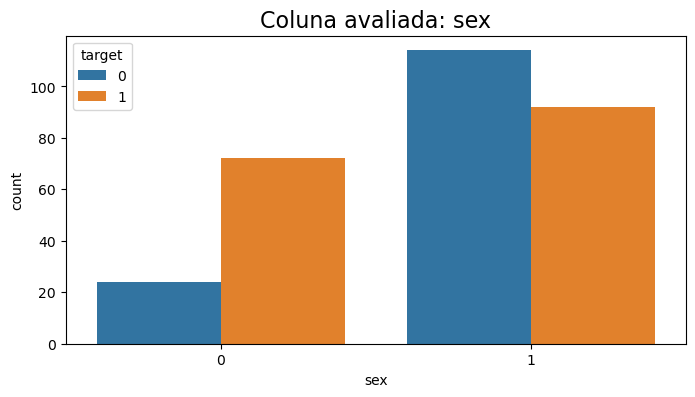

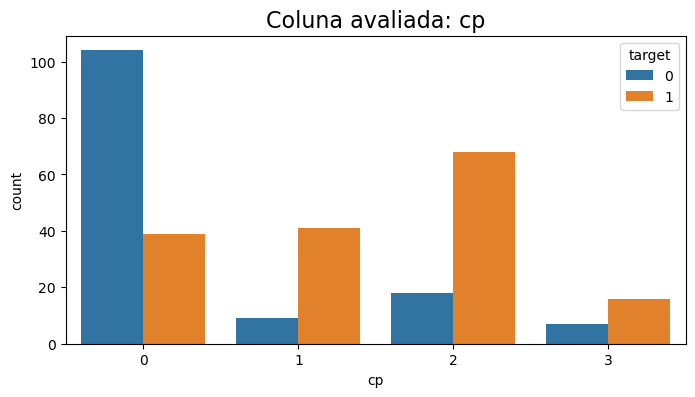

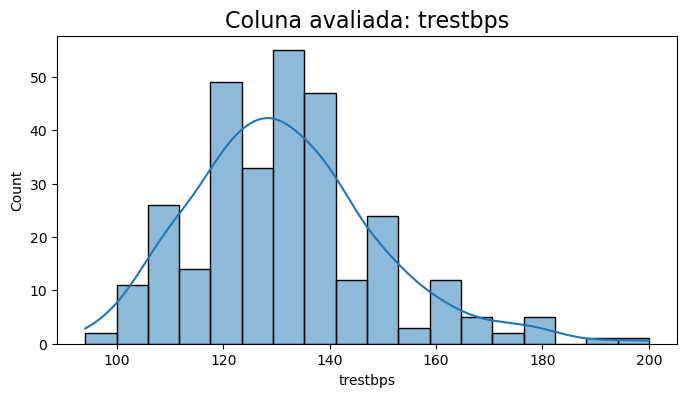

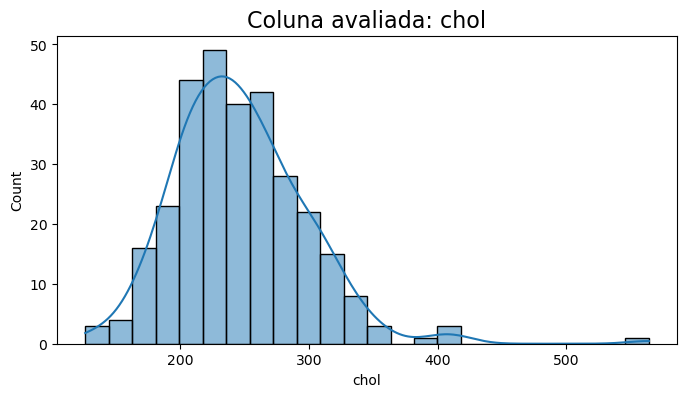

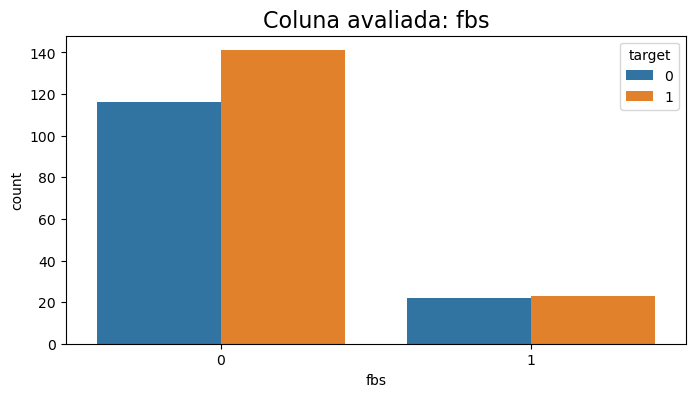

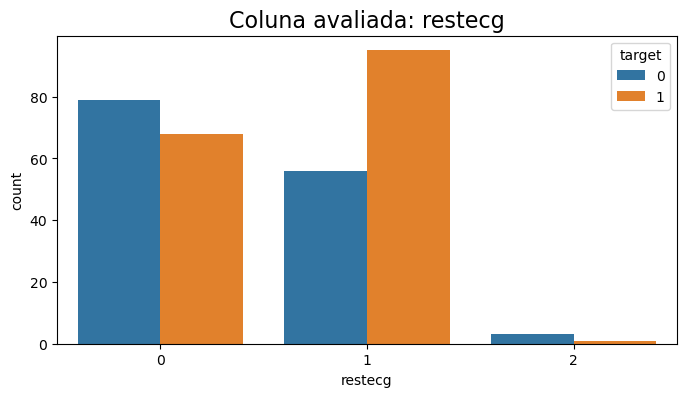

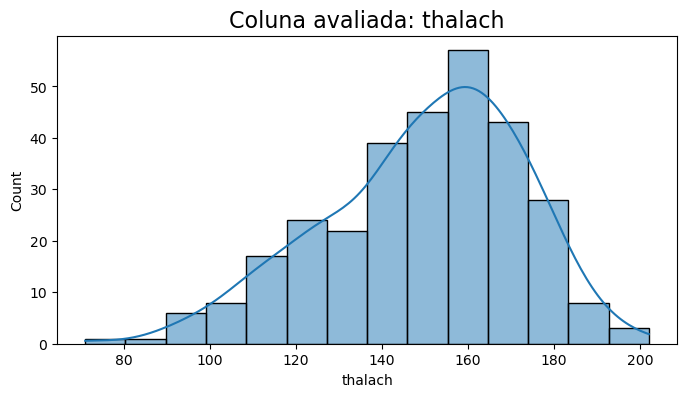

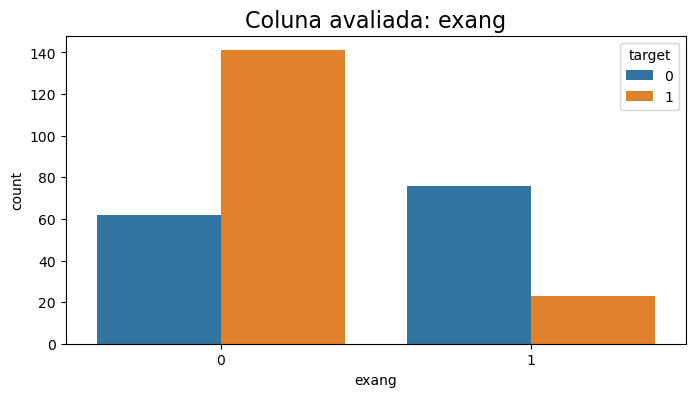

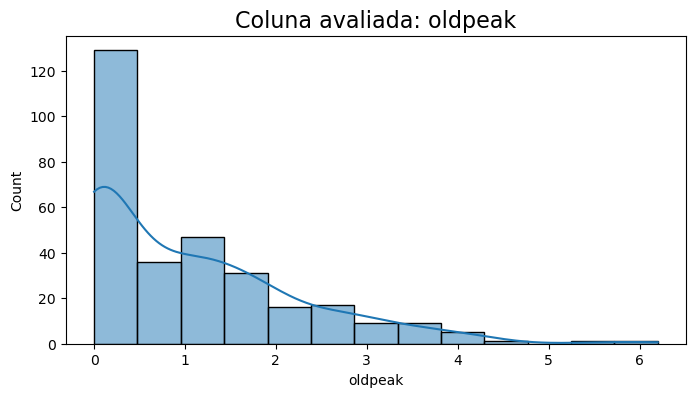

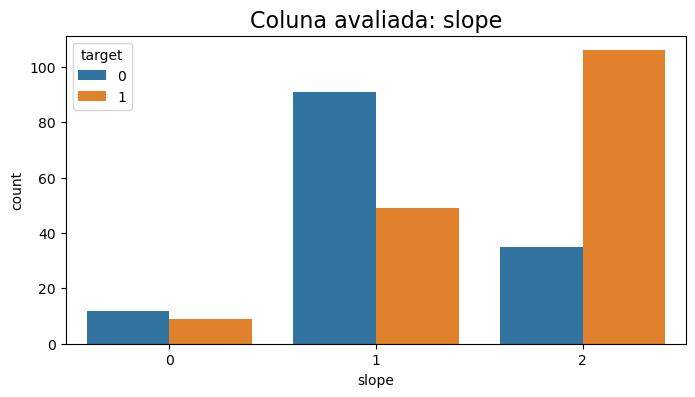

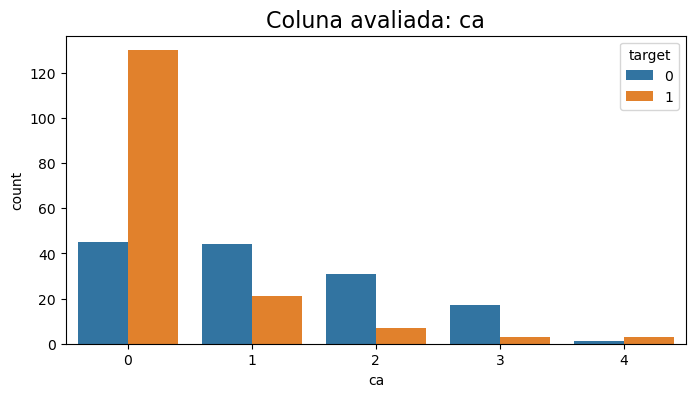

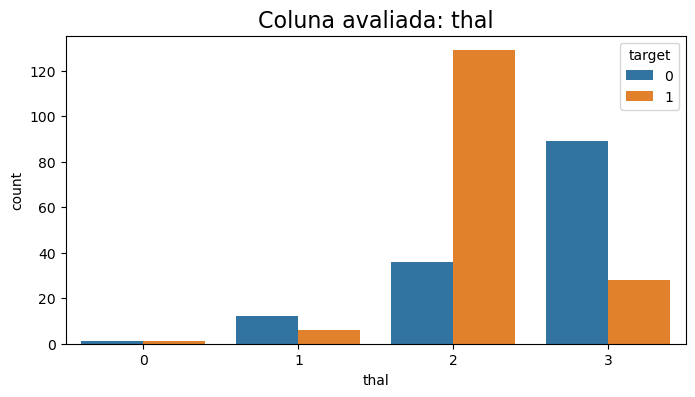

In [10]:
for c in df.columns[:-1]:
    plt.figure(figsize = (8,4))
    plt.title(f'Coluna avaliada: {c}', fontsize = 16)
    if c in categoricas:
        sns.countplot(x = df[c], hue=df['target'])
    if c in numericas:
        sns.histplot(df[c], kde = True)

# Removendo Outliers

<AxesSubplot:>

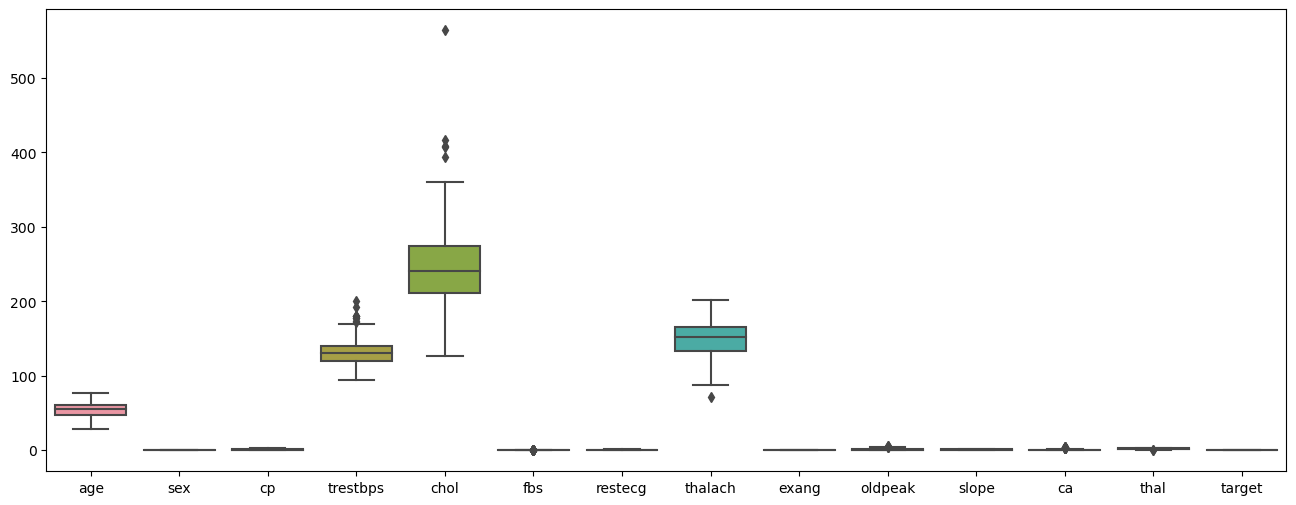

In [11]:
plt.figure(figsize = (16,6))
sns.boxplot(data = df)

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df['trestbps'].quantile(0.99)

180.0

In [14]:
df1 = df[df['trestbps'] < df['trestbps'].quantile(0.99)]

<AxesSubplot:>

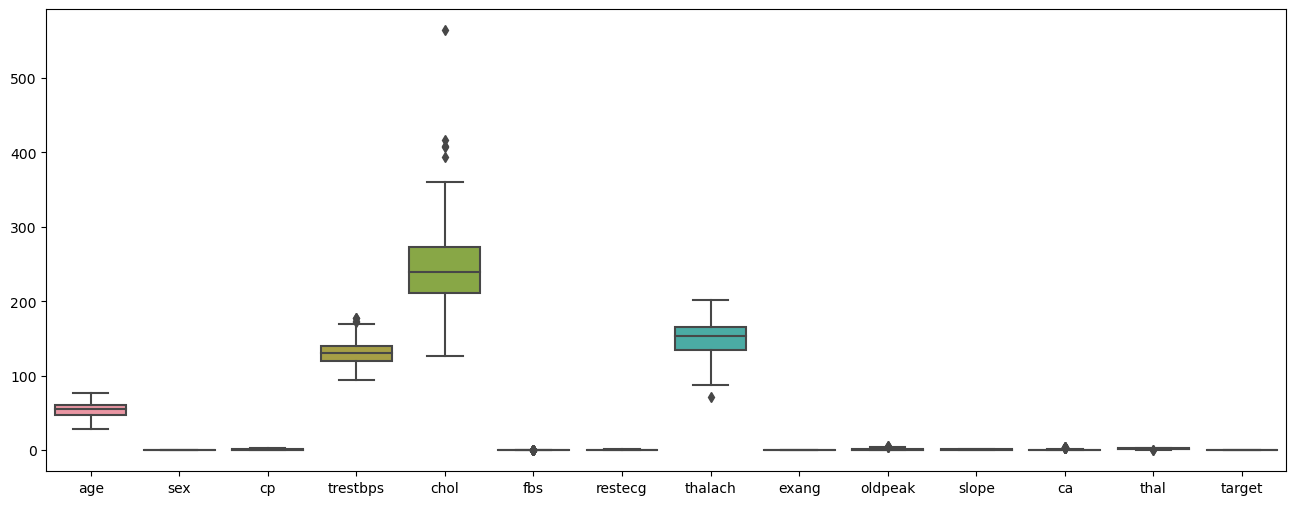

In [15]:
plt.figure(figsize = (16,6))
sns.boxplot(data = df1)

In [16]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
df1['chol'].quantile(0.975)

348.5999999999996

In [18]:
df2 = df1[df1['chol'] < df1['chol'].quantile(0.975)]

<AxesSubplot:>

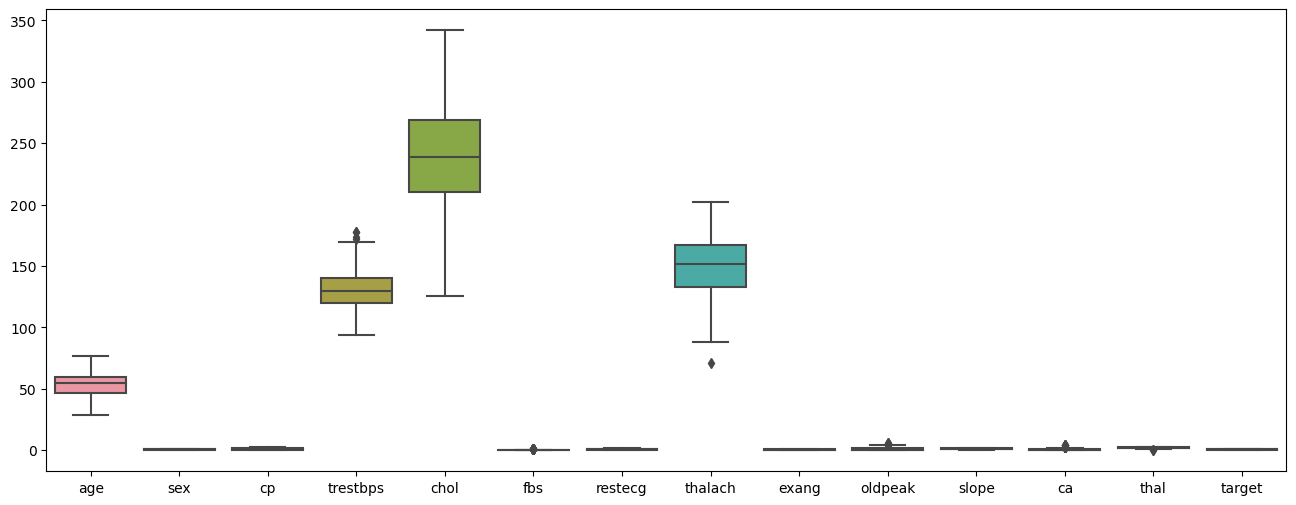

In [19]:
plt.figure(figsize = (16,6))
sns.boxplot(data = df2)

In [20]:
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.145329,0.702422,0.975779,130.522491,241.134948,0.145329,0.532872,149.470588,0.318339,1.016955,1.401384,0.716263,2.304498,0.546713
std,9.094011,0.457986,1.035533,16.186640,43.375530,0.353043,0.520209,23.104834,0.466640,1.147017,0.616440,1.008185,0.615777,0.498677
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,342.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
df2['thalach'].quantile(0.005)

88.88

In [22]:
df3 = df2[df2['thalach'] > df2['thalach'].quantile(0.005)]

<AxesSubplot:>

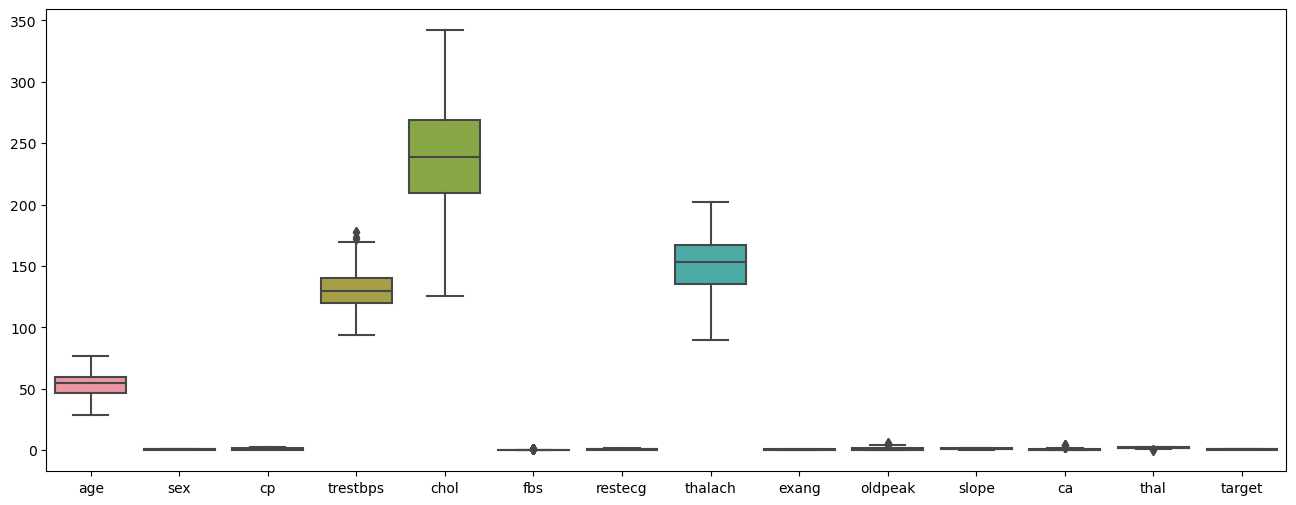

In [23]:
plt.figure(figsize = (16,6))
sns.boxplot(data = df3)

In [24]:
df3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,54.090592,0.700348,0.982578,130.484321,241.034843,0.146341,0.529617,149.958188,0.317073,1.016376,1.404181,0.717770,2.303136,0.550523
std,9.092309,0.458906,1.035916,16.181410,43.482721,0.354066,0.520551,22.418422,0.466149,1.150970,0.617674,1.010676,0.616292,0.498310
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.500000,0.000000,0.000000,135.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,167.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,342.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


---

In [25]:
# categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
# numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Função com aplicação do One Hot Encoding

In [26]:
def relatorio_ml(df, algoritmo, opt = 2):
        
    x = df.drop('target', axis = 1)
    y = df['target']
    
    ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])],
                       remainder='passthrough')
    x = ct.fit_transform(x)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    if opt == 0:
        ml = algoritmo(max_iter = 1000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    elif opt == 2:
        ml = algoritmo()
        
    ml.fit(x_train, y_train)
    score_train = ml.score(x_train, y_train)
    print(f'Acurácia treino: {score_train * 100:.2f}%')
    score_test = ml.score(x_test, y_test)
    print(f'Acurácia teste: {score_test * 100:.2f}%')
    
    y_pred = ml.predict(x_test)
    print('------CLASSIFICATION REPORT------')
    print(classification_report(y_test, y_pred))
    print('------CONFUSION MATRIX------')
    confusao = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusao, annot=True, cmap='Blues')
    
    return score_train, score_test

Acurácia treino: 86.90%
Acurácia teste: 86.21%
------CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.88      0.92      0.90        39

    accuracy                           0.86        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.86      0.86      0.86        58

------CONFUSION MATRIX------


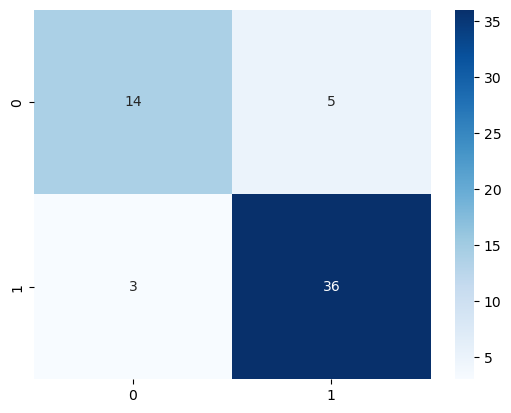

In [27]:
log_train, log_test = relatorio_ml(df3, LogisticRegression, opt = 0)

Acurácia treino: 100.00%
Acurácia teste: 74.14%
------CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.77      0.69      0.73        29

    accuracy                           0.74        58
   macro avg       0.74      0.74      0.74        58
weighted avg       0.74      0.74      0.74        58

------CONFUSION MATRIX------


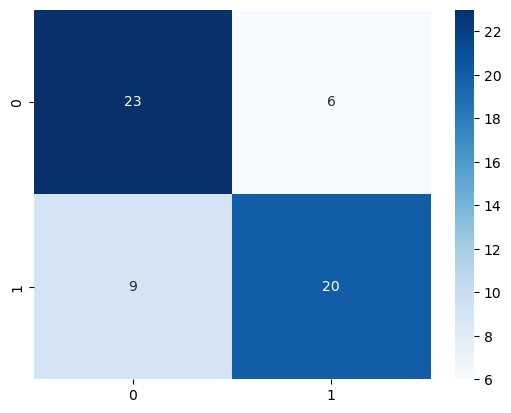

In [28]:
tree_train, tree_test = relatorio_ml(df3, DecisionTreeClassifier)

Acurácia treino: 94.76%
Acurácia teste: 75.86%
------CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.75      0.62      0.68        24
           1       0.76      0.85      0.81        34

    accuracy                           0.76        58
   macro avg       0.76      0.74      0.74        58
weighted avg       0.76      0.76      0.75        58

------CONFUSION MATRIX------


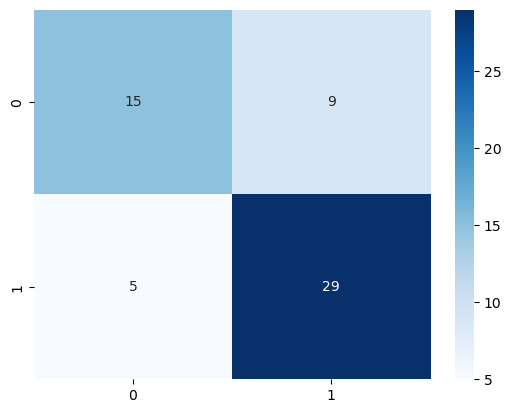

In [29]:
ada_train, ada_test = relatorio_ml(df3, AdaBoostClassifier)

Acurácia treino: 78.60%
Acurácia teste: 56.90%
------CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.48      0.50      0.49        24
           1       0.64      0.62      0.63        34

    accuracy                           0.57        58
   macro avg       0.56      0.56      0.56        58
weighted avg       0.57      0.57      0.57        58

------CONFUSION MATRIX------


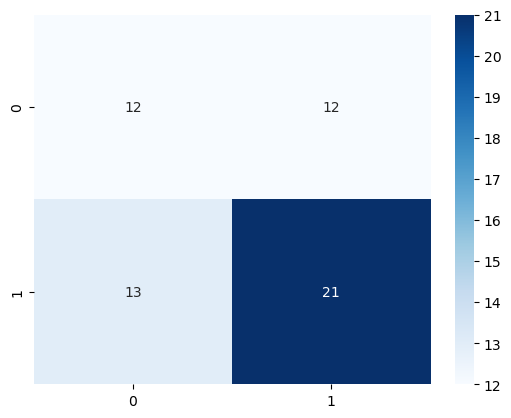

In [30]:
kn_train, kn_test = relatorio_ml(df3, KNeighborsClassifier)

Acurácia treino: 100.00%
Acurácia teste: 82.76%
------CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.80      0.86      0.83        28

    accuracy                           0.83        58
   macro avg       0.83      0.83      0.83        58
weighted avg       0.83      0.83      0.83        58

------CONFUSION MATRIX------


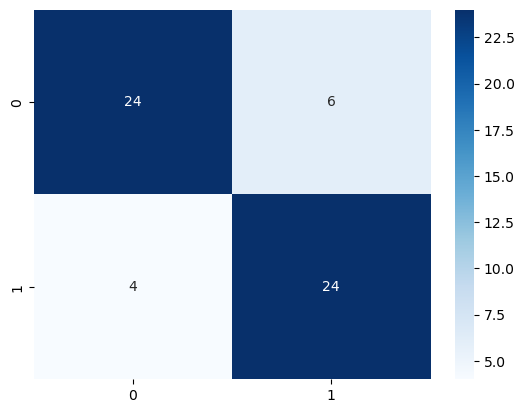

In [31]:
rand_train, rand_test = relatorio_ml(df3, RandomForestClassifier)

In [32]:
data = {'Modelos' : ['Logistic Regression', 'Descision Tree', 'KNeighbors', 'Random Forest', 'Ada Boost'],
       'Acurácia Treino' : [round(log_train * 100, 2), round(tree_train * 100, 2), round(kn_train * 100, 2),
                           round(rand_train * 100, 2), round(ada_train * 100, 2)],
        'Acurácia Teste': [round(log_test * 100, 2), round(tree_test * 100, 2), round(kn_test * 100, 2),
                           round(rand_test * 100, 2), round(ada_test * 100, 2)],
       }
df = pd.DataFrame(data)
df.sort_values(by='Acurácia Teste', ascending=False, inplace=True)
df

,Modelos,Acurácia Treino,Acurácia Teste
0,Logistic Regression,86.90,86.21
3,Random Forest,100.00,82.76
4,Ada Boost,94.76,75.86
1,Descision Tree,100.00,74.14
2,KNeighbors,78.60,56.90


# Incluindo o Standard Scaler

In [33]:
def relatorio_ml_scaler(df, algoritmo, opt = 2):
    
    x = df.drop('target', axis = 1)
    y = df['target']
    
    scaler = StandardScaler()
    cols_scaler = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    x[cols_scaler] = scaler.fit_transform(x[cols_scaler])
    
    ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])],
                       remainder='passthrough')
    x = ct.fit_transform(x)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    if opt == 0:
        ml = algoritmo(max_iter = 1000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    elif opt == 2:
        ml = algoritmo()
        
    ml.fit(x_train, y_train)
    score_train = ml.score(x_train, y_train)
    print(f'Acurácia treino: {score_train * 100:.2f}%')
    score_test = ml.score(x_test, y_test)
    print(f'Acurácia teste: {score_test * 100:.2f}%')
    
    y_pred = ml.predict(x_test)
    print('------CLASSIFICATION REPORT------')
    print(classification_report(y_test, y_pred))
    print('------CONFUSION MATRIX------')
    confusao = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusao, annot=True, cmap='Blues')
    
    return score_train, score_test

Acurácia treino: 88.21%
Acurácia teste: 86.21%
------CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.81      0.88      0.85        25

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.87      0.86      0.86        58

------CONFUSION MATRIX------


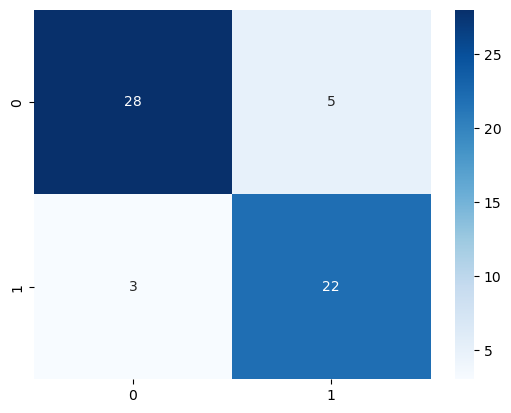

In [34]:
log_train_scaler, log_test_scaler = relatorio_ml_scaler(df3, LogisticRegression, opt=0)

Acurácia treino: 100.00%
Acurácia teste: 68.97%
------CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        29
           1       0.67      0.76      0.71        29

    accuracy                           0.69        58
   macro avg       0.69      0.69      0.69        58
weighted avg       0.69      0.69      0.69        58

------CONFUSION MATRIX------


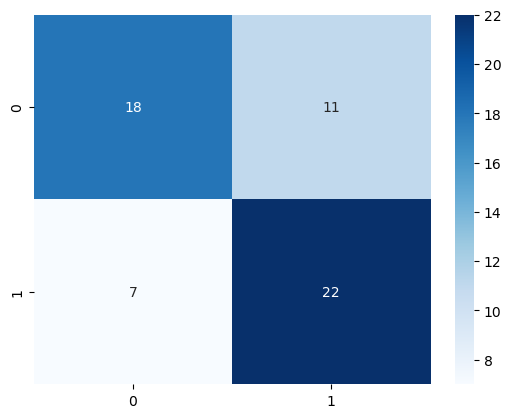

In [35]:
tree_train_scaler, tree_test_scaler = relatorio_ml_scaler(df3, DecisionTreeClassifier)

Acurácia treino: 93.89%
Acurácia teste: 81.03%
------CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        23
           1       0.85      0.83      0.84        35

    accuracy                           0.81        58
   macro avg       0.80      0.81      0.80        58
weighted avg       0.81      0.81      0.81        58

------CONFUSION MATRIX------


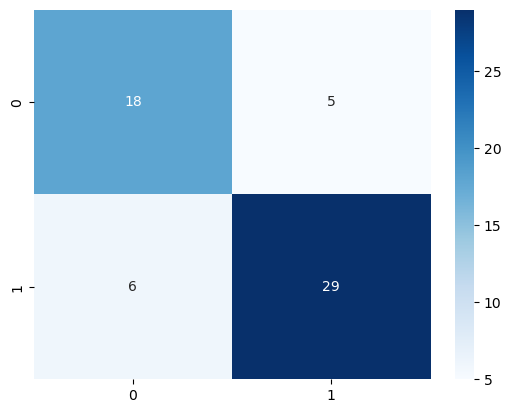

In [36]:
ada_train_scaler, ada_test_scaler = relatorio_ml_scaler(df3, AdaBoostClassifier)

Acurácia treino: 87.34%
Acurácia teste: 79.31%
------CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        23
           1       0.85      0.80      0.82        35

    accuracy                           0.79        58
   macro avg       0.78      0.79      0.79        58
weighted avg       0.80      0.79      0.79        58

------CONFUSION MATRIX------


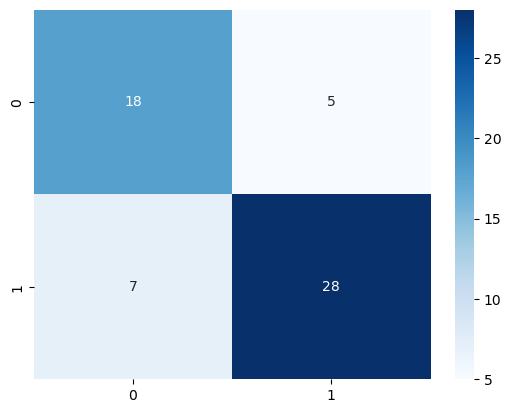

In [37]:
kn_train_scaler, kn_test_scaler = relatorio_ml_scaler(df3, KNeighborsClassifier)

Acurácia treino: 100.00%
Acurácia teste: 89.66%
------CLASSIFICATION REPORT------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        22
           1       0.94      0.89      0.91        36

    accuracy                           0.90        58
   macro avg       0.89      0.90      0.89        58
weighted avg       0.90      0.90      0.90        58

------CONFUSION MATRIX------


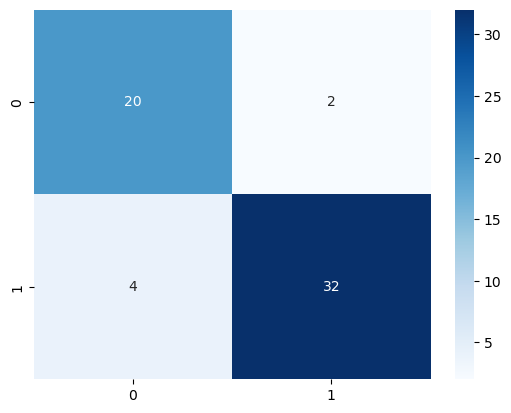

In [38]:
rand_train_scaler, rand_test_scaler = relatorio_ml_scaler(df3, RandomForestClassifier)

In [39]:
data_scaler = {'Modelos' : ['Logistic Regression', 'Descision Tree', 'KNeighbors', 'Random Forest', 'Ada Boost'],
       'Acurácia Treino' : [round(log_train_scaler * 100, 2), round(tree_train_scaler * 100, 2), round(kn_train_scaler * 100, 2),
                           round(rand_train_scaler * 100, 2), round(ada_train_scaler * 100, 2)],
        'Acurácia Teste': [round(log_test_scaler * 100, 2), round(tree_test_scaler * 100, 2), round(kn_test_scaler * 100, 2),
                           round(rand_test_scaler * 100, 2), round(ada_test_scaler * 100, 2)],
       }
df_scaler = pd.DataFrame(data_scaler)
df_scaler.sort_values(by='Acurácia Teste', ascending=False, inplace=True)

df_scaler

,Modelos,Acurácia Treino,Acurácia Teste
3,Random Forest,100.00,89.66
0,Logistic Regression,88.21,86.21
4,Ada Boost,93.89,81.03
2,KNeighbors,87.34,79.31
1,Descision Tree,100.00,68.97


In [40]:
df

,Modelos,Acurácia Treino,Acurácia Teste
0,Logistic Regression,86.90,86.21
3,Random Forest,100.00,82.76
4,Ada Boost,94.76,75.86
1,Descision Tree,100.00,74.14
2,KNeighbors,78.60,56.90
